In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def clearGutter(n):

  #read the required image
  fname = '/content/gutters' + n + '.JPG'
  img = cv.imread(fname)

  #convert the image to grayscale
  grayScale = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

  #dilate the image to remove the text. This preserves the text and pictures when we take difference later.
  dilate = cv.dilate(grayScale,np.ones((11,11),np.uint8))

  #Gaussian Blur to suppress the text and pictures further and get the background which has the shadow
  filterSize = 21
  gaussBlur = cv.GaussianBlur(dilate,(filterSize,filterSize),128)

  #taking the difference will make the background bits black (no difference) and the text and pictures white (large difference)
  cleared = 255 - cv.absdiff(grayScale,gaussBlur)

  #display the transformed image
  cv2_imshow(cleared)
  cv.waitKey(0)

  return

Enter a number (1 to 3) to clear gutter of that image: 3


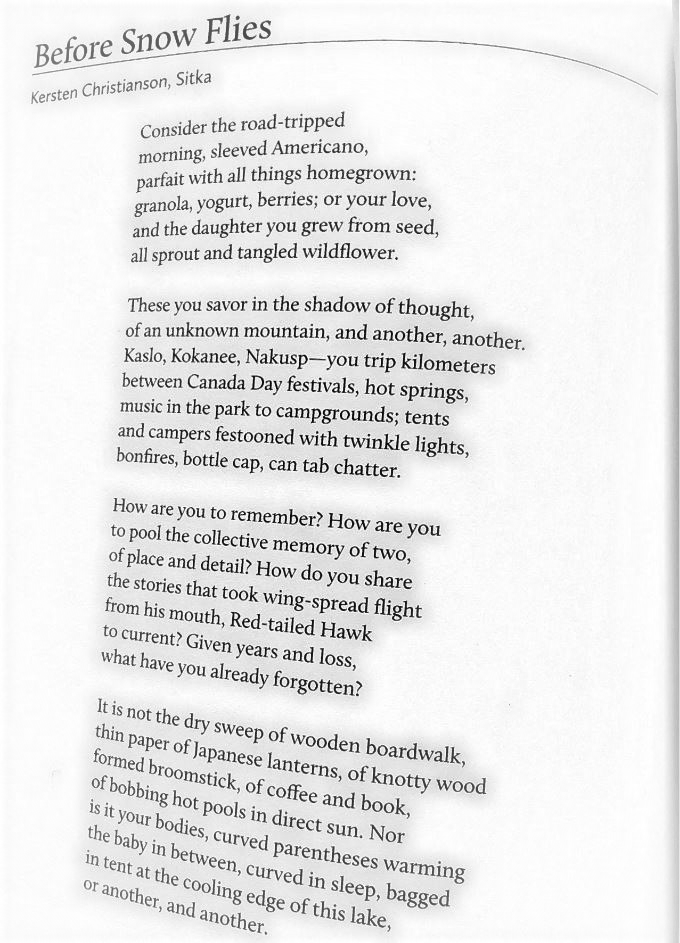

In [ ]:
n = str(input("Enter a number (1 to 3) to clear gutter of that image: "))
clearGutter(n)